In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import os
import scipy.stats as sts
import numpy as np
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

In [3]:
# Read CSV 
data_df = pd.read_csv('glassdoordata.csv')


In [16]:
# Rename Columns & Organize
renamed_data_df = data_df.rename(columns={"Company Name Witheld":"Company", "Low Salry":"Low Salary", "Job Description":"job_description"})
industry_df = renamed_data_df.set_index('Industry')
industry_cat_df = industry_df.rename(index={"Accounting":"Business/Finance/Accounting", "Advertising & Marketing" : "Business/Finance/Accounting", "Banks & Building Societies":"Business/Finance/Accounting", "Insurance Agencies & Brokerages":"Business/Finance/Accounting","Insurance Operators":"Business/Finance/Accounting","Investment Banking & Asset Management":"Business/Finance/Accounting","Lending":"Business/Finance/Accounting",
                          "Computer Hardware & Software":"Computer/Internet", "Enterprise Software & Network Solutions":"Computer/Internet", "IT Services":"Computer/Internet","Internet":"Computer/Internet", "Research & Development":"Computer/Internet","Enterprise Software & Network Solutions":"Computer/Internet", 
                          "Consulting" : "Consulting/Recruiting", "Staffing & Outsourcing" :"Consulting/Recruiting",   
                          "Charitable Foundations" : "Education", "Colleges & Universities": "Education", "Religious Organisations":"Education",
                          "Areospace & Defense": "Government/Military", "Government Agencies": "Government/Military",
                          "Biotech & Pharmaceuticals": "Healthcare","Healthcare Services & Hospitals": "Healthcare",
                          "Estate Agents":"Sales/HR/Retail/Services","General Merchandise & Superstores":"Sales/HR/Retail/Services","Legal":"Sales/HR/Retail/Services","Publishing":"Sales/HR/Retail/Services","Telecommunications Services":"Sales/HR/Retail/Services","Utilities":"Sales/HR/Retail/Services","Video Games":"Sales/HR/Retail/Services","holesale":"Sales/HR/Retail/Services","Brokerage Services":"Sales/HR/Retail/Services","Catering & Food Service Contractors":"Sales/HR/Retail/Services", 
                          "Membership Organisations":"Life/Physical/Social Sciences",
                          "Asphalt Product Manufacturing":"Manufacturing/Mechanical/Construction","Chemical Manufacturing":"Manufacturing/Mechanical/Construction", "Consumer Products Manufacturing":"Manufacturing/Mechanical/Construction","Industrial Manufacturing":"Manufacturing/Mechanical/Construction"})

industry_cat_df.head(50)

Company  \
Industry                                                                        
Healthcare Product Manufacturing                           Auris Health, Inc.   
Computer/Internet                        Applications Software Technology LLC   
NaN                                                            Seen by Indeed   
Electrical & Electronic Manufacturing                          Power Monitors   
Electrical & Electronic Manufacturing                       Carnegie Robotics   
Computer/Internet                                              Ellation, Inc.   
Computer/Internet                                                    Kite.com   
Sales/HR/Retail/Services                                    TracFone Wireless   
Travel Agencies                                               Fareportal Inc.   
NaN                                                      Hunter International   
Building & Construction                                      Corbins Electric   
Computer/Internet                                                   Glassdoor   
Business/Finance/Accounting                       North American Savings Bank   
Business/Finance/Accounting                                         Metromile   
Electrical & Electronic Manufacturing                       Applied Materials   
NaN                                                             Excello Homes   
Logistics & Supply Chain                                 Tideworks Technology   
Healthcare                                                              ADURO   
Business/Finance/Accounting                                    Octane Lending   
NaN                                                      Access Systems, Inc.   
NaN                                    HireResources - Information Technology   
Healthcare                                                  SAGE Therapeutics   
Computer/Internet                                                   Stefanini   
Consulting/Recruiting                          Source One Technical Solutions   
Consulting/Recruiting                                              Net2Source   
Computer/Internet                                           Stride Consulting   
Business/Finance/Accounting                                         Metromile   
Computer/Internet                                               Torc Robotics   
Computer/Internet                                                     vXchnge   
NaN                                             Boston Lighthouse Innovations   
NaN                                                         WB Games New York   
Computer/Internet                                                         IBM   
Computer/Internet                                        Procore Technologies   
Computer/Internet                           Business Technology Partners, LLP   
NaN                                                                Akinnovate   
Education Training Services                                        Codecademy   
Computer/Internet                                                       Avvio   
Consulting/Recruiting                                Software Resources, Inc.   
Computer/Internet                                                  EverString   
Aerospace & Defence                                                      KeyW   
Computer/Internet                                                 KeepTruckin   
Business/Finance/Accounting                          Liberty Mutual Insurance   
Building & Construction                                               Graycor   
Computer/Internet                                        Clean Power Research   
Computer/Internet                                                      Ibotta   
Computer/Internet                                                      Apolis   
Healthcare                                                   Reaction Biology   
Aerospace & Defence                                        CACI International   
Computer/Internet   

In [17]:
# find data positions and concat
data_analyst_df = industry_cat_df[(industry_cat_df['Job Title'] == "Data Analyst")]
data_engineer_df = industry_cat_df[(industry_cat_df['Job Title'] == "Data Engineer")]
data_scientist_df = industry_cat_df[(industry_cat_df['Job Title'] == "Data Scientist")]
data_jobs_df = pd.concat([data_analyst_df,data_engineer_df,data_scientist_df], ignore_index=False)
data_jobs_df.head()

Company     Job Title  \
Industry                                                                    
Business/Finance/Accounting     North American Savings Bank  Data Analyst   
Healthcare                                            ADURO  Data Analyst   
Computer/Internet                                 Stefanini  Data Analyst   
Consulting/Recruiting        Source One Technical Solutions  Data Analyst   
NaN                                              Akinnovate  Data Analyst   

                            Pay Type  High Salary  Low Salary  \
Industry                                                        
Business/Finance/Accounting   ANNUAL      76361.0     48957.0   
Healthcare                    ANNUAL      79363.0     52900.0   
Computer/Internet             ANNUAL      68589.0     40217.0   
Consulting/Recruiting            NaN          NaN         NaN   
NaN                              NaN          NaN         NaN   

                                                               job_description  \
Industry                                                                         
Business/Finance/Accounting  <h3>Job Description</h3><div>North American Sa...   
Healthcare                   <strong><div>SUMMARY</strong>:</div>\n\n<br/><...   
Computer/Internet            <div><strong>Stefanini is looking for a Data A...   
Consulting/Recruiting        Data Analyst\n<br/><br/>\n<strong>Job Descript...   
NaN                          <h3>Job Description</h3><div><strong>Responsib...   

                            Country      City, State  Rating Average  \
Industry                                                               
Business/Finance/Accounting      US  Kansas City, MO            0.88   
Healthcare                       US      Redmond, WA            0.67   
Computer/Internet                US      Reading, PA            0.71   
Consulting/Recruiting            US   Hicksville, NY            1.00   
NaN                              US   Washington, DC            1.00   

                             Number of Ratings  
Industry                                        
Business/Finance/Accounting              14139  
Healthcare                               19719  
Computer/Internet                        35072  
Consulting/Recruiting                    35180  
NaN                                      47154

In [18]:
grouped_title = data_jobs_df.groupby('Job Title')['Job Title'].count().sort_values(ascending=False)
grouped_title.head(60)

Job Title
Data Analyst      255
Data Scientist    164
Data Engineer      33
Name: Job Title, dtype: int64

Text(0, 0.5, 'Total Avaiable Positions')

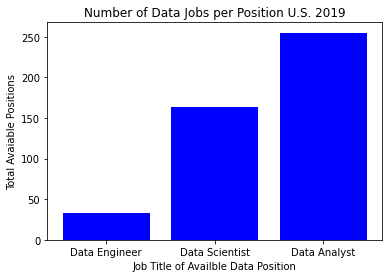

In [19]:
positions = ["Data Engineer", "Data Scientist","Data Analyst"]
value = [33, 164, 255]
plt.bar(positions, value, color = "b", align="center")
plt.title("Number of Data Jobs per Position U.S. 2019")
plt.xlabel("Job Title of Availble Data Position")
plt.ylabel("Total Avaiable Positions")

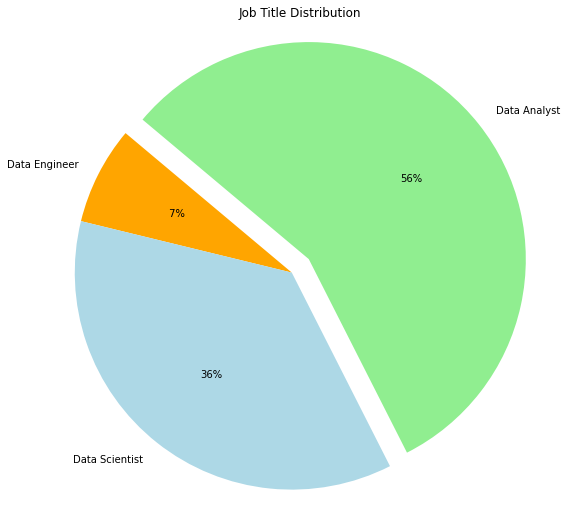

In [20]:
# do a pie chart of the number of job openings for different levels
topic =  ["Data Engineer", "Data Scientist", "Data Analyst"]

# Labels for the sections of our pie chart
labels = list(topic)
# The values of each section of the pie chart
sizes = [33, 164, 255]

# The colors of each section of the pie chart
colors = ["orange", "lightblue", "lightgreen"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1)

plt.figure(figsize=(9,9))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%2.f%%", startangle=140)

plt.axis("equal")
plt.title('Job Title Distribution')
plt.show()

In [21]:
grouped_cat = data_jobs_df.groupby('Industry')['Job Title'].count().sort_values(ascending=False)
grouped_cat.head(50)

Industry
Computer/Internet                        131
Consulting/Recruiting                    101
Business/Finance/Accounting               44
Sales/HR/Retail/Services                  27
Healthcare                                18
Education                                  9
Aerospace & Defence                        9
Manufacturing/Mechanical/Construction      8
Government/Military                        3
Film Production & Distribution             3
Sports & Recreation                        3
Music Production & Distribution            2
Life/Physical/Social Sciences              2
Haulage                                    2
Home Furniture and Houseware Shops         1
Transportation Management                  1
Financial Transaction Processing           1
News Outlets                               1
Department, Clothing, & Shoe Shops         1
Security Services                          1
Sporting Goods Shops                       1
Wholesale                                  1
N

In [22]:
industry_df = pd.DataFrame({'Industry':labels, 'JobOpening_Counts':sizes})
industry_df

Industry  JobOpening_Counts
0   Data Engineer                 33
1  Data Scientist                164
2    Data Analyst                255

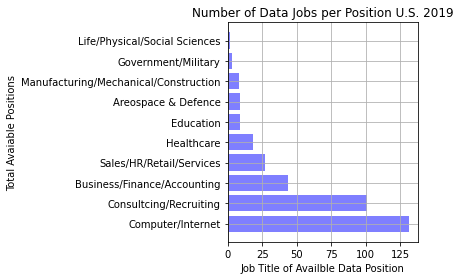

In [23]:
# Bar Chart, Position by industry
positions = ['Computer/Internet','Consultcing/Recruiting','Business/Finance/Accounting','Sales/HR/Retail/Services','Healthcare','Education','Areospace & Defence',
            'Manufacturing/Mechanical/Construction', 'Government/Military','Life/Physical/Social Sciences']
             
value = [131, 101,44,27,18,9,9,8,3,2]
plt.barh(positions, value, color='b', alpha=0.5, align="center")

plt.title("Number of Data Jobs per Position U.S. 2019")
plt.xlabel("Job Title of Availble Data Position")
plt.ylabel("Total Avaiable Positions")
plt.grid()
            
plt.tight_layout()

In [24]:
# --------- 1) Technical Skills ------------

# finalized technical skill set keywords:

# Statistics / Statistical Analysis
# Research / Research Design
# Question Formulation 
# Visualization
# Deep Learning
# Machine Learning
# Domain Knowledge
# Analysis / Analytical
# Cloud Computing (AWS)
# Regression
# Probability
# Prediction
# Network / Neural Networks

# create new columns with above keywords to store the flag,
# indicating if that specific keyword is included in the description
# 0 -> not included; 
# 1 -> included

# initialize the flag tags
data_jobs_df['TS_Stats_flag'] = 0 
data_jobs_df['TS_Research_flag'] = 0 
data_jobs_df['TS_QuesForm_flag'] = 0 
data_jobs_df['TS_Visual_flag'] = 0 
data_jobs_df['TS_DeepLearning_flag'] = 0 
data_jobs_df['TS_MachineLearning_flag'] = 0 
data_jobs_df['TS_DomainKnowledge_flag'] = 0 
data_jobs_df['TS_Analy_flag'] = 0 
data_jobs_df['TS_CloudComp_flag'] = 0 
data_jobs_df['TS_Regress_flag'] = 0 
data_jobs_df['TS_Probability_flag'] = 0 
data_jobs_df['TS_Prediction_flag'] = 0 
data_jobs_df['TS_NeuralNetwork_flag'] = 0 
data_jobs_df.head(5)

Company     Job Title  \
Industry                                                                    
Business/Finance/Accounting     North American Savings Bank  Data Analyst   
Healthcare                                            ADURO  Data Analyst   
Computer/Internet                                 Stefanini  Data Analyst   
Consulting/Recruiting        Source One Technical Solutions  Data Analyst   
NaN                                              Akinnovate  Data Analyst   

                            Pay Type  High Salary  Low Salary  \
Industry                                                        
Business/Finance/Accounting   ANNUAL      76361.0     48957.0   
Healthcare                    ANNUAL      79363.0     52900.0   
Computer/Internet             ANNUAL      68589.0     40217.0   
Consulting/Recruiting            NaN          NaN         NaN   
NaN                              NaN          NaN         NaN   

                                                               job_description  \
Industry                                                                         
Business/Finance/Accounting  <h3>Job Description</h3><div>North American Sa...   
Healthcare                   <strong><div>SUMMARY</strong>:</div>\n\n<br/><...   
Computer/Internet            <div><strong>Stefanini is looking for a Data A...   
Consulting/Recruiting        Data Analyst\n<br/><br/>\n<strong>Job Descript...   
NaN                          <h3>Job Description</h3><div><strong>Responsib...   

                            Country      City, State  Rating Average  \
Industry                                                               
Business/Finance/Accounting      US  Kansas City, MO            0.88   
Healthcare                       US      Redmond, WA            0.67   
Computer/Internet                US      Reading, PA            0.71   
Consulting/Recruiting            US   Hicksville, NY            1.00   
NaN                              US   Washington, DC            1.00   

                             Number of Ratings  ...  TS_Visual_flag  \
Industry                                        ...                   
Business/Finance/Accounting              14139  ...               0   
Healthcare                               19719  ...               0   
Computer/Internet                        35072  ...               0   
Consulting/Recruiting                    35180  ...               0   
NaN                                      47154  ...               0   

                             TS_DeepLearning_flag  TS_MachineLearning_flag  \
Industry                                                                     
Business/Finance/Accounting                     0                        0   
Healthcare                                      0                        0   
Computer/Internet                               0                        0   
Consulting/Recruiting                           0                        0   
NaN                                             0                        0   

                             TS_DomainKnowledge_flag  TS_Analy_flag  \
Industry                                                              
Business/Finance/Accounting                        0              0   
Healthcare                                         0              0   
Computer/Internet                                  0              0   
Consulting/Recruiting                              0              0   
NaN                                                0              0   

                             TS_CloudComp_flag  TS_Regress_flag  \
Industry                                                          
Business/Finance/Accounting                  0                0   
Healthcare                                   0                0   
Computer/Internet                            0                0   
Consulting/Recruiting                        0                0   
NaN                            

In [32]:
for irow in np.arange(len(data_jobs_df)):
    
    if ("statist" in data_jobs_df.job_description[irow]):
        data_jobs_df.iloc[irow,14] = 1
    
    if (("reasearch" in data_jobs_df.job_description[irow]) or ("research design" in data_jobs_df.job_description[irow])):
        data_jobs_df.iloc[irow,15] = 1
        
    if ("question formulation" in data_jobs_df.job_description[irow]):
        data_jobs_df.iloc[irow,16] = 1
        
    if ("visual" in data_jobs_df.job_description[irow]):
        data_jobs_df.iloc[irow,17] = 1
    
    if ("deep learning" in data_jobs_df.job_description[irow]):
        data_jobs_df.iloc[irow,18] = 1  
    
    if (("machine learning" in data_jobs_df.job_description[irow]) ):
        data_jobs_df.iloc[irow,19] = 1
      
    if (("domain knowledge" in data_jobs_df.job_description[irow]) ):
        data_jobs_df.iloc[irow,20] = 1
    
    if (("analy" in data_jobs_df.job_description[irow]) ):
        data_jobs_df.iloc[irow,21] = 1
    
    if (("cloud comp" in data_jobs_df.job_description[irow]) or ("contractor" in data_jobs_df.job_description[irow])):
        data_jobs_df.iloc[irow,22] = 1

TS_keywords = ['Statistics', 'Research', 'Question Formulation', 'Visualization',\
               'Deep Learning','Machine Learning','Domain Knowledge', 'Analytical',\
               'Cloud Computing', 'Regression', 'Probability', 'Prediction','Neural Networks']

for i_tech_skill in np.arange(len(TS_keywords)):
    
    TS_Count[i_tech_skill] = data_jobs_df.iloc[:,14+i_tech_skill].sum()

TS_Count

TypeError: 'numpy.int64' object does not support item assignment